In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools
from bathy_helpers import *
import matplotlib.path as mpltPath

In [3]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

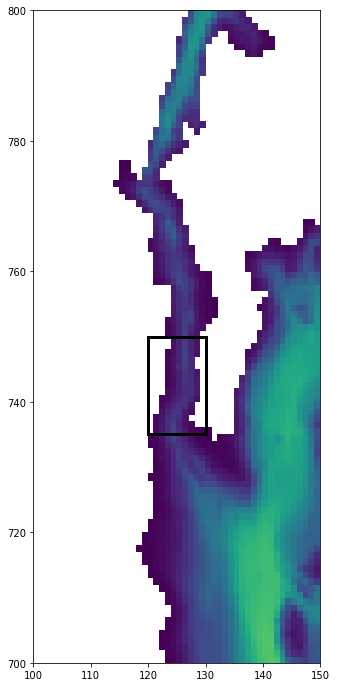

In [4]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.set_ylim(700,800)
ax.set_xlim(100,150)
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((120,735), 10, 15, fill=False, linewidth=3))

In [24]:
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [25]:
with open('initial_positions.txt', 'a') as f:
    for x in np.arange(120,130):
        for y in np.arange(735,750):
            for z in range(2,40): 
                if ((mesh_mask.variables['tmask'][0,z,y,x] == 1) and (mesh_mask.variables['tmask'][0,z+2,y,x] == 1) 
                and (mesh_mask.variables['tmask'][0,z,y+2,x] == 1) and (mesh_mask.variables['tmask'][0,z,y,x+2] == 1) 
                and (mesh_mask.variables['tmask'][0,z,y-1,x] == 1) and (mesh_mask.variables['tmask'][0,z,y,x-1] == 1)
                and (mesh_mask.variables['tmask'][0,z+2,y,x+1] == 1) and (mesh_mask.variables['tmask'][0,z+2,y,x-1] == 1)
               and (mesh_mask.variables['tmask'][0,z+2,y-1,x] == 1) and (mesh_mask.variables['tmask'][0,z+2,y+1,x] == 1)
               and (mesh_mask.variables['tmask'][0,z+2,y-1,x-1] == 1) and (mesh_mask.variables['tmask'][0,z+2,y-1,x+1] == 1)
               and (mesh_mask.variables['tmask'][0,z+2,y+1,x-1] == 1) and (mesh_mask.variables['tmask'][0,z+2,y+1,x+1] == 1)):
                    f.write((str(x) +' ' + str(y) +' '+ str(z+0.5)+ ' 0.5 1.0\n'))
                    f.write((str(x+0.25) +' ' + str(y) +' '+ str(z+0.5)+ ' 0.5 1.0\n'))
                    f.write((str(x+0.5) +' ' + str(y) +' '+ str(z+0.5)+ ' 0.5 1.0\n'))
                    f.write((str(x+0.75) +' ' + str(y) +' '+ str(z+0.5)+ ' 0.5 1.0\n'))
                    f.write((str(x) +' ' + str(y+0.5) +' '+ str(z+0.5)+ ' 0.5 1.0\n'))

In [6]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (grid.variables['nav_lat'][598,120], grid.variables['nav_lon'][598,120]), # left, bottom
    (grid.variables['nav_lat'][608,120], grid.variables['nav_lon'][608,120]), # left, top
    (grid.variables['nav_lat'][608,133], grid.variables['nav_lon'][608,133]), # right, top
    (grid.variables['nav_lat'][598,133], grid.variables['nav_lon'][598,133]), # right, bottom
    (grid.variables['nav_lat'][598,120], grid.variables['nav_lon'][598,120]), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

In [7]:
result = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/monthlong/ariane_trajectories_qualitative.nc')
latt = result.variables['traj_lat']
lont = result.variables['traj_lon']

In [10]:

number_of_particles=np.zeros(744)
for l in range(744):
    tf = path.contains_points(np.array((latt[l,:], lont[l,:])).T)
    tf = tf[tf[:]==True]
    x = tf.shape[0]
    number_of_particles[l]=x

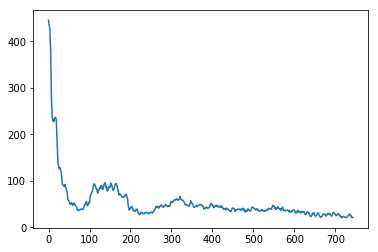

In [11]:
plt.plot(range(744), number_of_particles)

In [43]:
index_deep_particles=[]
d = result.variables['init_z']
for n in range(407):
    if d[n] > 6:
        index_deep_particles.append(n)

In [49]:
len(index_deep_particles)

253

In [46]:
mask = lont[:].mask
def deep_particles(time, index):
    number_of_deep_particles = np.zeros(time)
    for n in range(time):
        for m in index:
            if (mask[n,m]) == False: 
                tf = path.contains_point(np.array((latt[n,m], lont[n,m])).T)
                if tf == True:
                    number_of_deep_particles[n] = number_of_deep_particles[n] + 1
    return number_of_deep_particles

In [53]:
sa = deep_particles(168,index_deep_particles)

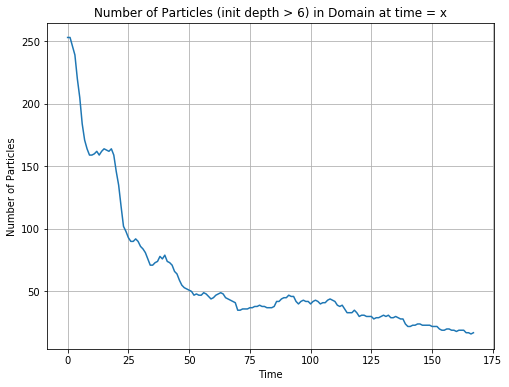

In [54]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
time = range(168)
ax.plot(time, sa)
ax.grid('on')
ax.set_title('Number of Particles (init depth > 6) in Domain at time = x')
ax.set_ylabel('Number of Particles')
ax.set_xlabel('Time')

In [56]:
2694*.37

996.78

In [1]:
from matplotlib.path import Path
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import matplotlib.patches as patches
from salishsea_tools import viz_tools, geo_tools, tidetools
from bathy_helpers import *

In [2]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
Jul = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/monthlong/ariane_trajectories_qualitative.nc')
Jul_latt = Jul.variables['traj_lat']
Jul_lont = Jul.variables['traj_lon']
Oct = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Oct16/ariane_trajectories_qualitative.nc')
Oct_latt = Oct.variables['traj_lat']
Oct_lont = Oct.variables['traj_lon']
Jan = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Jan17/ariane_trajectories_qualitative.nc')
Jan_latt = Jan.variables['traj_lat']
Jan_lont = Jan.variables['traj_lon']
Apr = nc.Dataset('/ocean/vdo/MEOPAR/ariane-runs/Apr17/ariane_trajectories_qualitative.nc')
Apr_latt = Apr.variables['traj_lat']
Apr_lont = Apr.variables['traj_lon']

In [3]:
with nc.Dataset('/home/mdunphy/MEOPAR/NEMO-forcing/grid/coordinates_seagrid_SalishSea201702.nc', 'r') as cnc:
    glamf = cnc.variables['glamf'][0,...]; gphif = cnc.variables['gphif'][0,...]
    glamt = cnc.variables['glamt'][0,...]; gphit = cnc.variables['gphit'][0,...]
NY, NX = glamt.shape[0], glamt.shape[1]
glamfe, gphife = expandf(glamf, gphif)

In [7]:
def still_inside(il, ir, jl, jr, lont, latt):
    p = makebox(glamfe,gphife,il,ir,jl,jr)
    poly = path.Path(p, closed=True) 
    time, particles = lont.shape
    number_of_particles = np.zeros(time)
    for l in range(time):
        cx = lont[l,:]
        cy = latt[l,:]
        pts = np.array([cx,cy]).T
        test = poly.contains_points(pts)
        number_of_particles[l]= sum(test)
    return number_of_particles

In [8]:
Jul_all = still_inside(118,134,598,658,Jul_lont, Jul_latt)

In [9]:
Jul_all[:5]

array([ 2689.,  2672.,  2624.,  2571.,  2526.])

In [10]:
from scipy.optimize import curve_fit

In [11]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


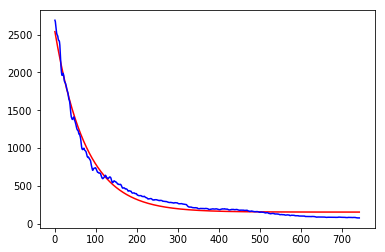

In [18]:
popt, pcov = curve_fit(func, range(744), Jul_all)
plt.plot(range(744), func(range(744), *popt), 'r-', label='fit')
plt.plot(range(744), Jul_all, 'b-')

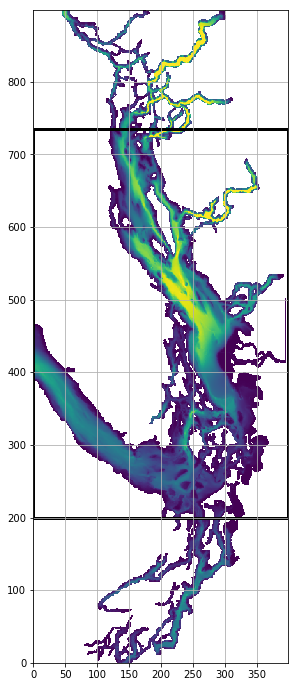

In [27]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
ax.pcolormesh(grid.variables['Bathymetry'][:])
viz_tools.set_aspect(ax)
ax.add_patch(patches.Rectangle((0,200), 398, 535, fill=False, linewidth=3))
ax.grid('on')